Nama : Purwohudiono

NIM : 5312422044

Prodi : Teknik Komputer

Mata Kuliah : Pengolahan Sinyal Digital

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lfilter, freqz, butter, firls, remez, firwin, firwin2, group_delay
from scipy.fftpack import fft, fftshift

# Konfigurasi ukuran font untuk plot
FONT_SMALL = 12  # Ukuran font kecil
FONT_MEDIUM = 14  # Ukuran font sedang

# Mengatur ukuran font untuk elemen-elemen dalam plot menggunakan plt.rc
plt.rc('axes', titlesize=FONT_MEDIUM)  # Ukuran font untuk judul sumbu
plt.rc('axes', labelsize=FONT_SMALL)   # Ukuran font untuk label sumbu
plt.rc('xtick', labelsize=FONT_SMALL)  # Ukuran font untuk label di sumbu x
plt.rc('ytick', labelsize=FONT_SMALL)  # Ukuran font untuk label di sumbu y
plt.rc('legend', fontsize=FONT_MEDIUM) # Ukuran font untuk legenda
plt.rc('figure', titlesize=FONT_MEDIUM) # Ukuran font untuk judul figure

# Mengaktifkan inline plotting untuk menampilkan plot langsung di notebook
%matplotlib inline


<ipython-input-2-ace146f5e872>:18: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y1, use_line_collection=True, basefmt='C0')  # Membuat plot stem untuk respons impuls


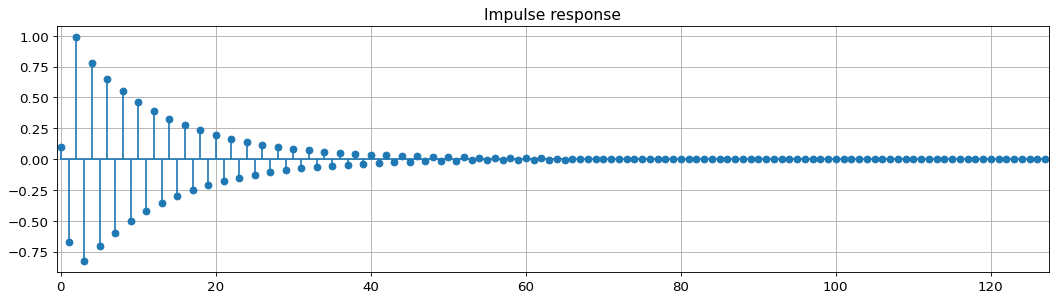

In [2]:
N = 128  # Panjang sinyal

# Delta-function
x = np.zeros(N)  # Membuat array berisi nol dengan panjang N
x[0] = 1  # Mengatur elemen pertama menjadi 1 untuk membuat fungsi delta

# Input signal:
# h(z) = [b0 + b1*z^(-1) + b2*z^(-2)] / [a0 + a1*z^(-1) + a2*z^(-2)]
b = [0.1, -0.6, 0.5]  # Koefisien numerator (b0, b1, b2)
a = [1, 0.7, -0.2]  # Koefisien denominator (a0, a1, a2)

# Filter sinyal x menggunakan koefisien b dan a
y1 = lfilter(b, a, x)  # Menghitung respons impuls dari filter

# Membuat figure baru untuk plot
plt.figure(figsize=(16, 4), dpi=80)  # Mengatur ukuran figure dan DPI
plt.title('Impulse response')  # Menambahkan judul plot
plt.stem(y1, use_line_collection=True, basefmt='C0')  # Membuat plot stem untuk respons impuls
plt.xlim([-0.5, N-0.5])  # Mengatur batas sumbu x
plt.grid(True)  # Menambahkan grid ke plot


Gambar di atas menampilkan grafik berjudul "Respon Impuls," yang mengilustrasikan bagaimana suatu entitas merespons terhadap impuls dari waktu ke waktu. Beberapa aspek penting dari grafik ini adalah:

1. Sumbu X (horizontal): Menyatakan waktu, dengan satuan yang tidak spesifik (seperti detik, milidetik, atau lainnya), dari 0 hingga sekitar 125.
2. Sumbu Y (vertikal): Menunjukkan amplitudo respons, berkisar dari -1.0 hingga 1.0.
3. Titik-titik biru: Merepresentasikan nilai respons pada titik waktu tertentu. Titik-titik ini membentuk pola osilasi di sekitar nilai nol, dengan amplitudo yang secara perlahan menurun.

Interpretasi lebih rinci:
- Grafik ini menyoroti bahwa respons awal adalah yang paling signifikan, kemudian berosilasi mendekati nol.
- Amplitudo osilasi secara bertahap menurun, menunjukkan bahwa setelah beberapa waktu, sistem stabil kembali ke kondisi netral (amplitudo nol).

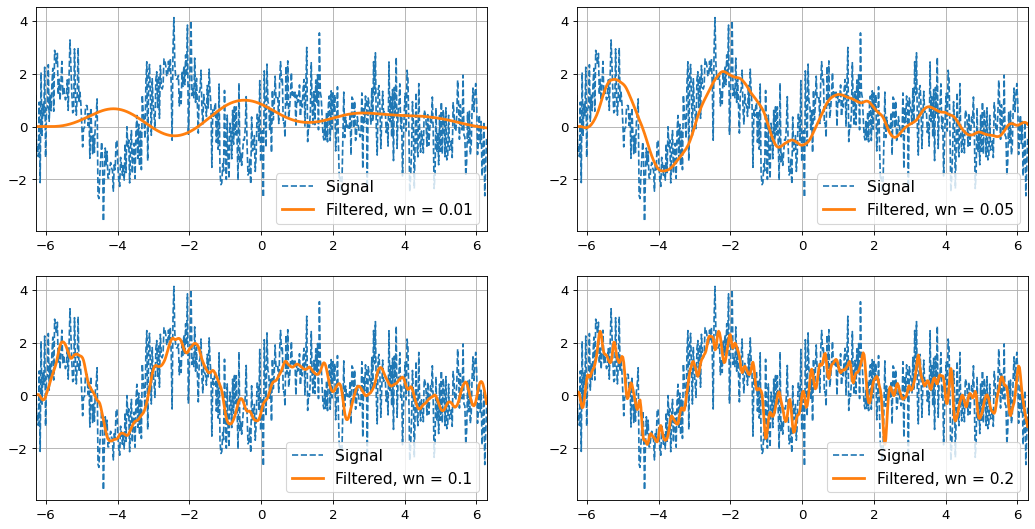

In [3]:
# Create input signal
t = 2 * np.pi * np.linspace(-1, 1, 500)  # Membuat vektor waktu dengan 500 titik dari -2π hingga 2π
x = np.sin(0.25 * t * t) + 0.95 * np.sin(2.0 * t)  # Membuat sinyal input sebagai kombinasi dari dua sinyal sinusoidal

# Add some white noise
np.random.seed(1)  # Mengatur seed untuk menghasilkan noise yang sama setiap kali dijalankan
xn = x + np.random.randn(len(t))  # Menambahkan white noise ke sinyal

# 3-order lowpass butterworth filter
b, a = butter(3, 0.2)  # Membuat filter lowpass Butterworth orde 3 dengan frekuensi cut-off 0.2
z = lfilter(b, a, xn)  # Menerapkan filter ke sinyal yang terkontaminasi noise

wn = [0.01, 0.05, 0.1, 0.2]  # Daftar frekuensi cut-off yang akan digunakan

# Calculate IIR filter
zz = np.zeros((t.size, 4))  # Membuat array untuk menyimpan hasil filter
for i in range(4):  # Loop untuk menerapkan filter dengan berbagai frekuensi cut-off
    b, a = butter(3, wn[i])  # Membuat filter Butterworth orde 3 dengan frekuensi cut-off wn[i]
    zz[:, i] = lfilter(b, a, xn)  # Menerapkan filter ke sinyal yang terkontaminasi noise dan menyimpan hasilnya

# Plot results
plt.figure(figsize=(16, 8), dpi=80)  # Membuat figure baru dengan ukuran dan DPI yang ditentukan
for i in range(4):  # Loop untuk membuat subplot untuk setiap frekuensi cut-off
    plt.subplot(2, 2, i+1)  # Membuat subplot 2x2
    plt.plot(t, xn, 'C0--', linewidth=1.5)  # Plot sinyal yang terkontaminasi noise dengan garis putus-putus
    plt.plot(t, zz[:,i], 'C1', linewidth=2.5)  # Plot sinyal yang telah difilter
    plt.xlim([-2 * np.pi, 2 * np.pi])  # Mengatur batas sumbu x
    plt.grid(True)  # Menambahkan grid ke plot
    plt.legend(('Signal', 'Filtered, wn = {}'.format(wn[i])), loc='lower right')  # Menambahkan legenda

# Menampilkan plot yang telah dibuat
plt.show()


Gambar ini menampilkan empat plot yang teratur dalam grid 2x2, masing-masing menunjukkan contoh pemrosesan sinyal dengan berbagai jendela filter.

1. Plot Kiri Atas:
- Judul/Label:
  - Sumbu x berkisar dari -6 hingga 6.
  - Sumbu y berkisar dari -3 hingga 3.
  - Legenda termasuk "Sinyal" dan "Hasil Filter, wn = 0.01" (Hasil Filter, ukuran jendela = 0.01).
- Konten:
  - Garis putus-putus biru mewakili sinyal asli.
  - Garis solid orange menunjukkan hasil penyaringan sinyal dengan jendela ukuran 0.01.

2. Plot Kanan Atas:
- Judul/Label:
  - Sumbu x berkisar dari -6 hingga 6.
  - Sumbu y berkisar dari -3 hingga 3.
  - Legenda mencakup "Sinyal" dan "Hasil Filter, wn = 0.05" (Hasil Filter, ukuran jendela = 0.05).
-Konten:
  - Garis putus-putus biru mewakili sinyal asli.
  - Garis solid orange menunjukkan hasil penyaringan sinyal dengan jendela ukuran 0.05.

3. Plot Kiri Bawah:
- Judul/Label:
  - Sumbu x berkisar dari -6 hingga 6.
  - Sumbu y berkisar dari -3 hingga 3.
  - Legenda mencakup "Sinyal" dan "Hasil Filter, wn = 0.1" (Hasil Filter, ukuran jendela = 0.1).
- Konten:
  - Garis putus-putus biru mewakili sinyal asli.
  - Garis solid orange menunjukkan hasil penyaringan sinyal dengan jendela ukuran 0.1.

4. Plot Kanan Bawah:
- Judul/Label:
  - Sumbu x berkisar dari -6 hingga 6.
  - Sumbu y berkisar dari -3 hingga 3.
  - Legenda mencakup "Sinyal" dan "Hasil Filter, wn = 0.2" (Hasil Filter, ukuran jendela = 0.2).
- Konten:
  - Garis putus-putus biru mewakili sinyal asli.
  - Garis solid orange menunjukkan hasil penyaringan sinyal dengan jendela ukuran 0.2.

Observasi Umum:
- Pada semua plot, sinyal asli (garis putus-putus biru) tetap konsisten.
- Efek penyaringan (garis solid orange) menghasilkan penyempurnaan sinyal dengan tingkat yang bervariasi, yang menunjukkan peningkatan penghalusan seiring dengan peningkatan ukuran jendela (wn) dari 0.01 hingga 0.2.

In [4]:
N = 40  # Panjang sinyal

# Delta-function
x = np.zeros(N)  # Membuat array berisi nol dengan panjang N
x[0] = 1  # Mengatur elemen pertama menjadi 1 untuk membuat fungsi delta

# Filter order - M
M = 16  # Orde filter

# Input signal:
# h(z) = 1 + z^(-1) + ... + z^(-9)
b = np.ones(M-1)  # Koefisien numerator (semua bernilai 1 sebanyak M-1)
a = [1]  # Koefisien denominator (hanya ada satu elemen bernilai 1)

# Menghitung respons impuls dari filter menggunakan bentuk non-rekursif
y1 = lfilter(b, a, x)

# Mengubah ke bentuk rekursif
b = np.zeros(M)  # Membuat array koefisien numerator berisi nol dengan panjang M
b[0] = 1  # Mengatur elemen pertama numerator menjadi 1
b[M-1] = -1  # Mengatur elemen terakhir numerator menjadi -1

a = [1, -1]  # Koefisien denominator (1 dan -1)

# Menghitung respons impuls dari filter menggunakan bentuk rekursif
y2 = lfilter(b, a, x)

# Memeriksa perbedaan antara dua respons impuls
np.all(y1 == y2)  # Mengembalikan True jika semua elemen y1 sama dengan y2


True

<ipython-input-5-41f4dead11a5>:2: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(y2, use_line_collection=True, basefmt='C0')  # Membuat plot stem dari respons impuls filter


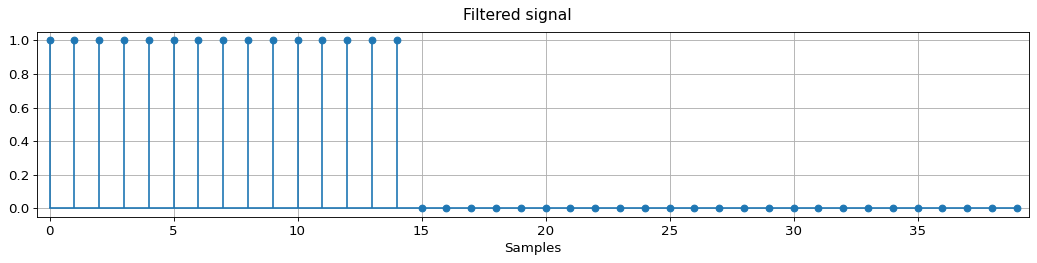

In [5]:
plt.figure(figsize=(16, 3), dpi=80)  # Membuat figure baru dengan ukuran dan DPI yang ditentukan
plt.stem(y2, use_line_collection=True, basefmt='C0')  # Membuat plot stem dari respons impuls filter
plt.xlim([-0.5, N-0.5])  # Mengatur batas sumbu x
plt.xlabel('Samples')  # Menambahkan label pada sumbu x
plt.suptitle('Filtered signal')  # Menambahkan judul utama
plt.grid(True)  # Menambahkan grid ke plot


Gambar tersebut adalah grafik berjudul "Sinyal Setelah Difilter." Dalam grafik ini, sumbu horizontal (x) menunjukkan jumlah sampel (Samples), sedangkan sumbu vertikal (y) menunjukkan amplitudo sinyal yang telah difilter.

Berikut adalah beberapa penjelasan mengenai grafik ini:

1. Judul Grafik:
- Grafik ini diberi judul "Sinyal Setelah Difilter," menandakan bahwa ini adalah representasi dari sinyal setelah melalui proses filtrasi.

2. Sumbu X (Horizontal):
- Sumbu x ditandai sebagai "Samples," yang menunjukkan jumlah sampel yang diambil dari sinyal dalam domain waktu.

3. Sumbu Y (Vertikal):
- Sumbu y mewakili amplitudo sinyal setelah proses filtrasi. Rentang nilai amplitudo berkisar dari 0 hingga 1.

4. Karakteristik Grafik:
- Pada awalnya, dari sample 0 hingga sekitar 15, amplitudo sinyal stabil pada nilai 1.0, menunjukkan bahwa sinyal mungkin memiliki amplitudo konstan di bagian awal.
- Namun, setelah sampel ke-15, amplitudo sinyal menurun mendekati nol dan tetap rendah hingga akhir grafik. Ini mengindikasikan bahwa sinyal telah dipotong atau ditolak setelah titik ini oleh proses filtrasi.

5. Interpretasi Umum:
- Grafik ini mungkin menggambarkan hasil dari penerapan filter yang memotong atau menekan sinyal setelah sampel ke-15. Ini bisa terjadi karena penggunaan filter low-pass, high-pass, atau jenis filter lain yang telah diterapkan pada sinyal input.

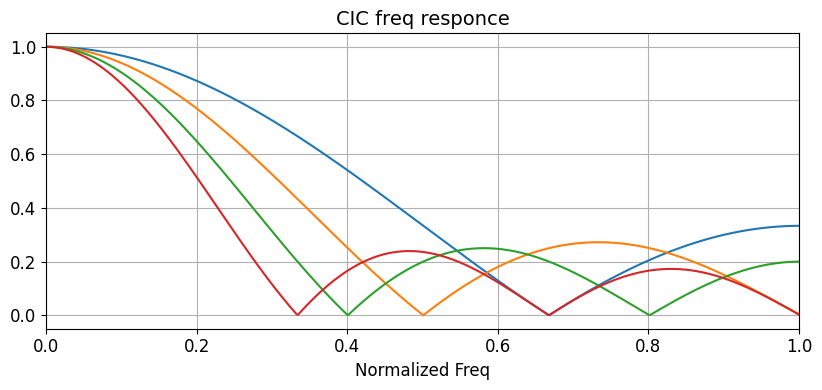

In [6]:
N = 512  # Panjang vektor frekuensi
f = np.linspace(0, 1, N, endpoint=True)  # Membuat vektor frekuensi dari 0 hingga 1
b = [1, 1, 1]  # Koefisien filter awal

plt.figure(figsize=(16, 4))  # Membuat figure baru dengan ukuran yang ditentukan
plt.subplot(1, 2, 1)  # Membuat subplot 1x2, plot pertama

# Loop untuk membuat plot respons frekuensi dari filter CIC dengan berbagai orde
for i in range(4):
    _, h = freqz(b, N)  # Menghitung respons frekuensi menggunakan freqz
    h = np.abs(h)  # Mengambil nilai magnitudo respons frekuensi
    plt.plot(f, h/np.max(h))  # Plot respons frekuensi, dinormalisasi terhadap nilai maksimum
    plt.xlim([0, 1])  # Mengatur batas sumbu x
    plt.grid(True)  # Menambahkan grid ke plot
    b.append(1)  # Menambahkan 1 ke koefisien filter

plt.xlabel('Normalized Freq')  # Menambahkan label pada sumbu x
plt.title('CIC freq responce')  # Menambahkan judul plot
plt.tight_layout()  # Menata subplot agar rapi


Gambar ini adalah grafik yang menunjukkan respons frekuensi dari Cascaded Integrator-Comb (CIC) filter. Grafik ini mengilustrasikan bagaimana respon frekuensi dari filter CIC berubah seiring dengan frekuensi yang dinormalisasi.

Berikut adalah penjelasan rinci tentang elemen-elemen dalam gambar ini:
- Judul Grafik: "CIC Frequency Response" menunjukkan bahwa grafik ini menggambarkan respons frekuensi dari filter CIC.
- Sumbu Y: Menunjukkan magnitude atau besarannya, dengan rentang dari 0 hingga 1. Magnitude ini mencerminkan seberapa banyak frekuensi yang diredam atau diteruskan oleh filter CIC.
- Sumbu X: Menunjukkan frekuensi yang telah dinormalisasi, dengan rentang dari 0 hingga 1. Frekuensi yang dinormalisasi mengacu pada frekuensi yang telah disesuaikan berdasarkan frekuensi sampel maksimum sistem.
- Garis Berombak: Merepresentasikan respons frekuensi dari filter CIC pada berbagai tingkat decimation atau perulangan filter yang berbeda. Semakin banyak tahapan decimation, semakin tajam penurunan respons frekuensinya.

<ipython-input-7-c223120b861e>:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(taps, use_line_collection=True, basefmt='C0')  # Membuat plot stem dari tap filter


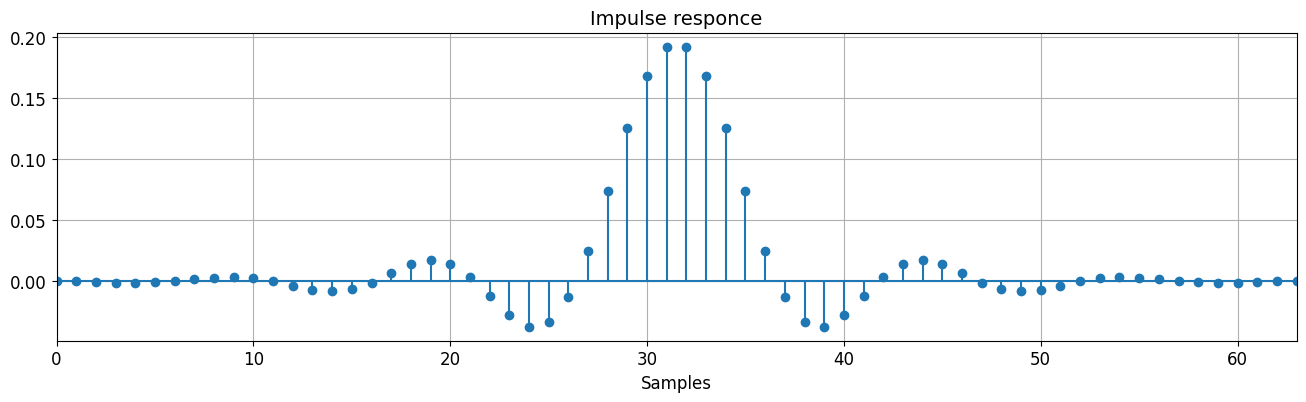

In [7]:
N = 100  # Jumlah titik dalam daftar frekuensi dan gain
lst_freqs = np.linspace(0, 1, N)  # Membuat daftar frekuensi dari 0 hingga 1
lst_gain = np.zeros(N)  # Membuat daftar gain sepanjang N dengan nilai awal 0
lst_gain[0:20] = 1  # Mengatur nilai gain menjadi 1 untuk 20 elemen pertama
NFIR = 64  # Panjang filter FIR
taps = firwin2(NFIR, lst_freqs, lst_gain)  # Menghasilkan tap filter FIR menggunakan metode firwin2

plt.figure(figsize=(16, 4), dpi=100)  # Membuat figure baru dengan ukuran dan resolusi tertentu
plt.title('Impulse responce')  # Menambahkan judul pada plot
plt.stem(taps, use_line_collection=True, basefmt='C0')  # Membuat plot stem dari tap filter
plt.xlim([0, NFIR-1])  # Mengatur batas sumbu x
plt.xlabel('Samples')  # Menambahkan label pada sumbu x
plt.grid(True)  # Menambahkan grid pada plot


Gambar tersebut adalah grafik yang menunjukkan respons impuls dari suatu sistem. Berikut adalah penjelasan mengenai beberapa elemen penting pada grafik:

1. Judul: Grafik ini diberi judul "Impulse Response," yang menandakan bahwa grafik tersebut menggambarkan respons impuls dari suatu sistem, biasanya dalam domain waktu.

2. Sumbu X (Horizontal): Label "Samples" menunjukkan bahwa sumbu ini merepresentasikan sampel-sampel dalam domain waktu. Setiap titik pada sumbu ini mewakili waktu atau indeks sampel tertentu.

3. Sumbu Y (Vertikal): Nilai pada sumbu ini menunjukkan amplitudo atau besar dari respons impuls pada setiap sampel. Rentang amplitudo berkisar dari sekitar 0 hingga 0.20.

4. Titik Data: Titik-titik data pada grafik menunjukkan nilai amplitudo dari respons sistem terhadap impuls pada setiap sampelnya. Mayoritas nilai amplitudo berada di sekitar nol, kecuali pada bagian tengah yang memiliki beberapa nilai yang cukup signifikan.

5. Bentuk Grafik: Bentuk grafik menunjukkan bahwa sistem memiliki respons impuls dengan amplitudo puncak di tengah, diikuti oleh nilai-nilai kecil pada sampel sebelumnya dan sesudahnya. Hal ini umumnya menunjukkan karakteristik dari filter atau sistem linear.

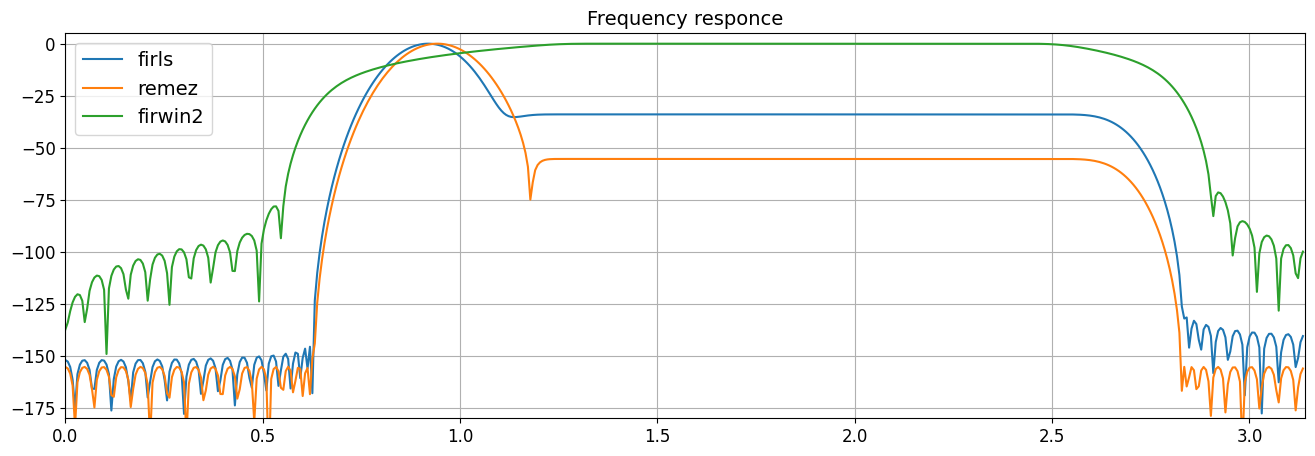

In [8]:
# Input parameters
fs = 10  # Frekuensi sampel
N = 117  # Panjang filter

# Desired response (ideal frequency response)
desired = (0, 0, 1, 1, 0, 0)  # Tanggapan frekuensi yang diinginkan (ideal)
bands = (0, 1, 2, 4, 4.5, 5)  # Batas frekuensi untuk filter

# FIR filters
fir_firls = firls(N, bands, desired, fs=fs)  # Membuat filter FIR menggunakan metode firls
fir_remez = remez(N, bands, desired[::2], fs=fs)  # Membuat filter FIR menggunakan metode remez
fir_firwin2 = firwin2(N, bands, desired, fs=fs)  # Membuat filter FIR menggunakan metode firwin2

# PLot results and calculate FFTs
plt.figure(figsize=(16, 5))  # Membuat figure baru dengan ukuran tertentu
plt.title('Frequency responce')  # Menambahkan judul pada plot
for fir in (fir_firls, fir_remez, fir_firwin2):
    freq, resp = freqz(fir)  # Menghitung respons frekuensi menggunakan freqz
    resp = np.abs(resp)  # Mengambil nilai magnitudo respons frekuensi
    resp /= np.max(resp) + 10**(-15)  # Normalisasi respons frekuensi
    plt.plot(freq, 20*np.log10(resp))  # Plot respons frekuensi dalam skala dB

plt.xlim([0, np.pi])  # Mengatur batas sumbu x
plt.ylim([-180, 5])  # Mengatur batas sumbu y
plt.legend(['firls', 'remez', 'firwin2'], loc ='upper left')  # Menambahkan legenda
plt.grid(True)  # Menambahkan grid pada plot


Gambar tersebut mengilustrasikan respons frekuensi dari tiga filter digital yang berbeda. Berikut adalah penjelasan rinci mengenai respons frekuensi yang ditampilkan:

1. Sumbu Horizontal (sumbu x): Mewakili frekuensi yang dinormalisasi (dalam satuan π rad/sample), yang umumnya berada dalam rentang dari 0 hingga π (atau dari 0 hingga 1.0 dalam nilai yang dinormalisasi).

2. Sumbu Vertikal (sumbu y): Mewakili amplitudo (dalam dB) dari respons frekuensi filter. Nilai amplitudo ini menunjukkan seberapa kuat atau lemah sinyal pada frekuensi tertentu akan dilewati oleh filter.

3. Garis Hijau Tua (firls): Menampilkan respons frekuensi dari filter yang didesain menggunakan metode "Least Squares Linear Phase FIR". Filter ini menunjukkan karakteristik filter pita lebar, dengan sebagian besar frekuensi di tengah rentang memiliki amplifikasi yang relatif konstan.

4. Garis Biru (remez): Menunjukkan respons frekuensi dari filter yang dirancang menggunakan metode "Parks-McClellan Optimal FIR". Filter ini juga menunjukkan karakteristik pita lebar, tetapi dengan peredaman yang lebih signifikan di luar rentang pita lulus (passband).

5. Garis Jingga (firwin2): Merepresentasikan respons frekuensi dari filter yang dibuat menggunakan metode "Window Method FIR". Filter ini memiliki karakteristik yang mirip dengan filter lainnya, namun dengan penurunan amplitudo yang lebih drastis di luar rentang pita lulus.


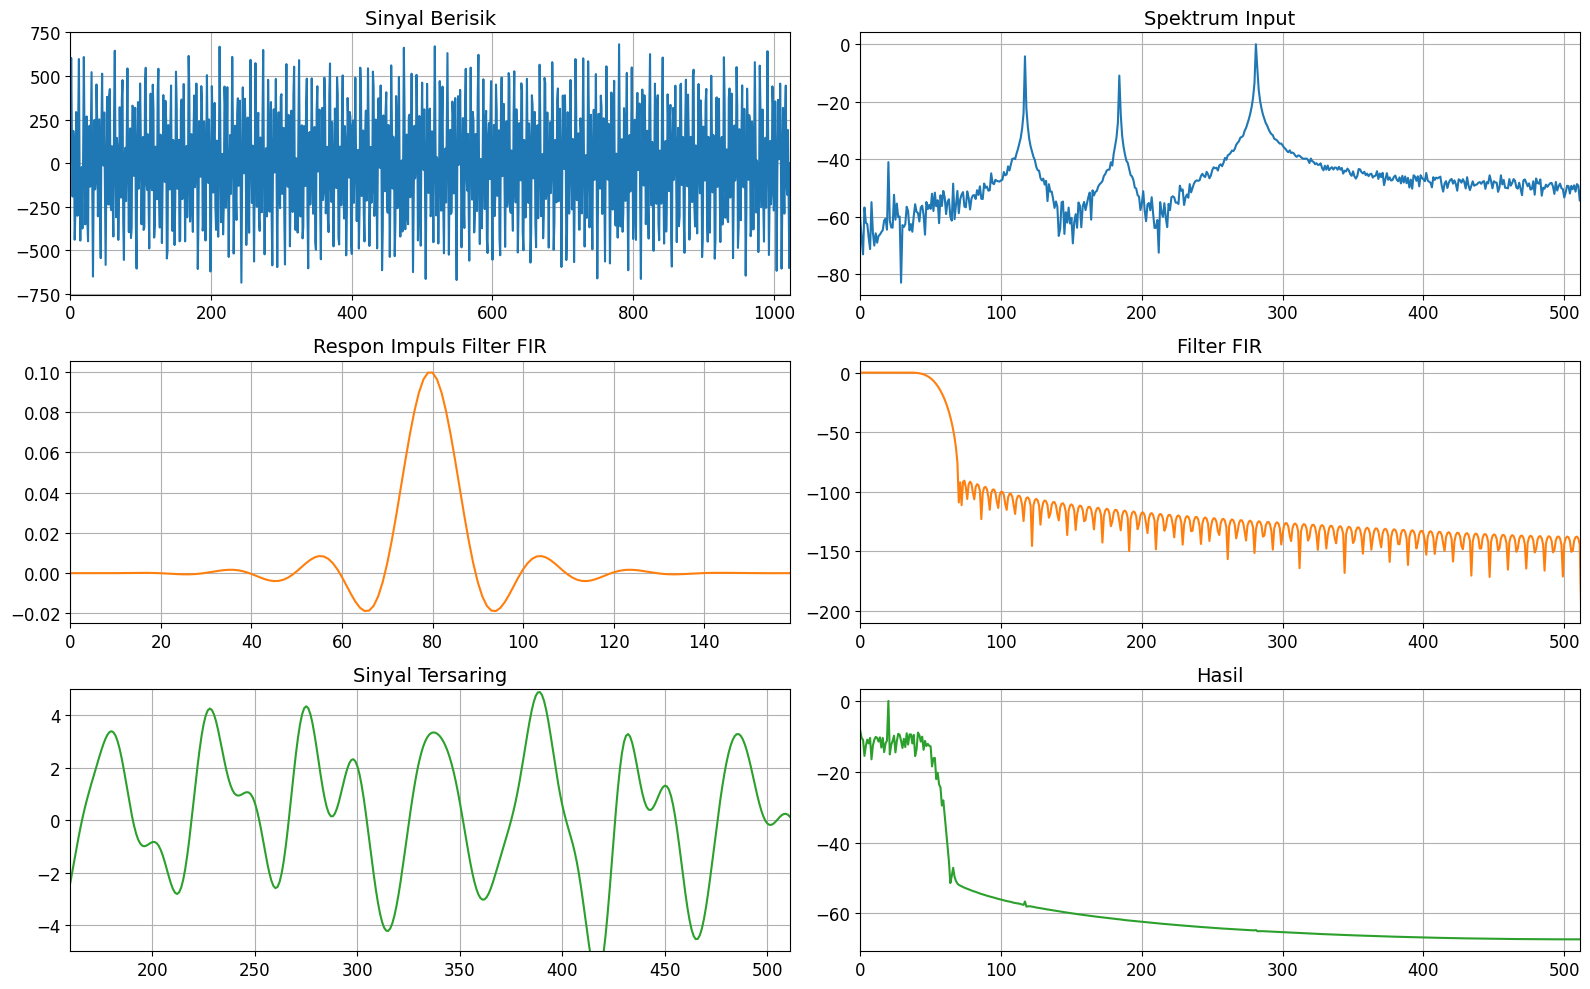

In [9]:
# Jumlah sampel sinyal input
N = 1024

# Membuat sinyal input
t = np.linspace(0, 1, N, endpoint=True)
x = 3*np.cos(2*np.pi*20*t) + 210*np.sin(2*np.pi*117*t) + 100*np.sin(2*np.pi*184*t) + 380*np.sin(2*np.pi*281*t)

# Menambahkan noise putih
np.random.seed(1)
xn = x + 5*np.random.randn(N)

# Desain filter FIR Kaiser
taps = 160
h = firwin(taps, 0.1, window=('kaiser', 9))

# Filtering sinyal input menggunakan filter FIR
y = lfilter(h, 1, xn)

# List sinyal input
lst_sig = [xn, h, y]

# Judul untuk setiap sinyal dan FFT
sig_titles = ['Sinyal Berisik', 'Respon Impuls Filter FIR', 'Sinyal Tersaring']
fft_titles = ['Spektrum Input', 'Filter FIR', 'Hasil']

# Membuat plot
plt.figure(figsize=(16, 10))
for i in range(3):
    # Menghitung FFT
    clc_fft = np.abs(fft(lst_sig[i], N))
    clc_fft = 20*np.log10(10e-11+clc_fft/np.max(clc_fft))

    # Plot sinyal
    plt.subplot(3, 2, 2*i+1)
    plt.plot(lst_sig[i], color='C'+str(i))
    plt.title(sig_titles[i])
    if (i == 2):
        plt.ylim([-5, 5])
        plt.xlim([taps, lst_sig[i].size//2-1])
    else:
        plt.xlim([0, lst_sig[i].size-1])
    plt.grid(True)

    # Plot FFT
    plt.subplot(3, 2, 2*(i+1))
    plt.plot(clc_fft, color='C'+str(i))
    plt.title(fft_titles[i])
    plt.xlim([0, N//2-1])
    plt.grid(True)
plt.tight_layout()

Grafik-grafik di atas menampilkan berbagai analisis sinyal, mulai dari sinyal asli yang berisik hingga hasil akhir setelah melewati proses penyaringan dengan filter FIR. Berikut adalah penjelasan rinci tentang setiap grafik:

1. Sinyal Berisik (Kiri Atas):
- Deskripsi: Menampilkan sinyal asli yang dipengaruhi oleh gangguan atau noise. Amplitudo sinyal bervariasi karena adanya noise.
- Fungsi: Menggambarkan pengaruh noise terhadap sinyal asli.

2. Spektrum Input (Kanan Atas):
- Deskripsi: Menunjukkan spektrum frekuensi dari sinyal input, dengan puncak-puncak frekuensi yang teridentifikasi.
- Fungsi: Memberikan informasi tentang distribusi energi sinyal pada berbagai frekuensi, membantu dalam menganalisis frekuensi yang dominan dalam sinyal.

3. Respons Impuls Filter FIR (Kiri Tengah):
- Deskripsi: Merupakan respons impuls dari filter Finite Impulse Response (FIR) terhadap input yang berupa impuls.
- Fungsi: Menunjukkan karakteristik waktu dari filter FIR, menjelaskan bagaimana filter merespons sinyal impuls unit.

4. Filter FIR (Kanan Tengah):
- Deskripsi: Menampilkan koefisien dari filter FIR yang digunakan, yang menggambarkan desain dari filter tersebut.
- Fungsi: Memberikan pemahaman tentang implementasi filter FIR melalui nilai-nilai koefisiennya.

5. Sinyal Tersaring (Kiri Bawah):
- Deskripsi: Menampilkan sinyal setelah melewati filter FIR, dengan noise yang sudah teredam.
- Fungsi: Menggambarkan hasil akhir dari sinyal setelah diolah oleh filter FIR, menunjukkan perbaikan dari sinyal asli yang berisik.

6. Hasil (Kanan Bawah):
- Deskripsi: Merupakan hasil akhir dari proses penyaringan dan penyesuaian lebih lanjut. Terlihat lebih bersih dengan noise yang berkurang signifikan.
- Fungsi: Menunjukkan hasil akhir dari seluruh proses filter dan memperlihatkan peningkatan kualitas sinyal.
Secara keseluruhan, grafik-grafik ini membentuk serangkaian tahapan analisis dan penyaringan dari sinyal asli yang berisik, menjelaskan transformasi dari sinyal awal hingga hasil akhir setelah proses filtering.